# Chaotic Systems z Informatyki Systemów Złożonych

Jako podstawę tego notatnika wykorzystałem przygotowany notatnik:

> Monika Darosz & Tomasz Michalec - https://mybinder.org/v2/gh/Chimstaz/PyCXlab/master 

Zadania z pliku `LAB_1_b.docx` zostały przygotowane przez: _prof. dr hab. inż. Witold Dzwinel_.

Zadania wykonane przez: _Wojciech Kosztyła_.

# Teoria chaosu

## Odwzorowanie logistyczne
$$
x_{n+1} = a x_n (1 - x_n)
$$
Mimo swej prostoty, odwzorowanie okazuje się chaotyczne dla pewnych wartości parametru $a$.

Poniższy kod rysuje wykres bifurkacji. Na osi x są wartości parametru $a$. Wartości $x_i$ dla $i$ z przedziału \[1000;1200\] zostały oznaczone na osi y.

Dla niektórych wartości początkowych $x_0$ wykres może się różnić.

__Zadanie__: Spróbuj znaleźć $x_0$ dla których wykres bifurkacji się zmieni.

In [10]:
%matplotlib inline
# Drawing bifurcation diagrams in Python
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu
#
# Ported to Python 3 by Przemyslaw Szufel & Bogumil Kaminski 2013
# {pszufe, bkamins}@sgh.waw.pl
#
# Extract plot_bifurcation function by Monika Darosz & Tomasz Michalec 2019

import pylab as PL
# define an iterative map

def f(a, x):
    return a * x * (1 - x)

# draw a bifurcation diagram

def plot_bifurcation(x0=0.01, aStart=0, aEnd=4.0, da=0.005, samplingStartTime=1000, sampleNumber=200):
    resultA = []
    resultX = []

    a = aStart
    while a <= aEnd:
        x = x0
        for t in range(samplingStartTime):
            x = f(a, x)
        for t in range(sampleNumber):
            x = f(a, x)
            resultA.append(a)
            resultX.append(x)
        a += da

    PL.plot(resultA, resultX, 'bo', markersize=0.2)
    PL.title(f"x0={x0}")
    PL.show()


# Zadania


## Zadanie 1

W tym zadaniu proszę znaleźć inne  odwzorowanie także dające jako wynik ciekawe wykresy bifurkacyjne (patrz Wikipedia pochodna Schwartza dla układów chaotycznych).

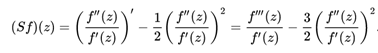

In [62]:
%matplotlib inline
matplotlib.rc('figure', figsize=(10, 5))

import pylab as PL

def f(a, x):
    return a*x - x*x*x
    # Skorzystałem ze wzoru z https://en.wikipedia.org/wiki/Pitchfork_bifurcation

def plot_my_bifurcation(x0=0.01, aStart=0.0, aEnd=4.0, da=0.0005, samplingStartTime=1000, sampleNumber=200):
    resultA = []
    resultX = []

    a = aStart
    while a <= aEnd:
        x = x0
        for t in range(samplingStartTime):
            x = f(a, x)
        for t in range(sampleNumber):
            x = f(a, x)
            resultA.append(a)
            resultX.append(x)
        a += da

    PL.plot(resultA, resultX, 'bo', markersize=0.01)
    PL.show()

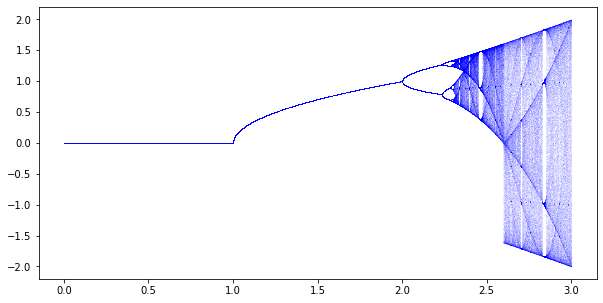

In [63]:
plot_my_bifurcation()

## Zadanie 2

Zrealizuj następujące zadania:


### 2.a

Dokonaj symulacji na zaburzonym odwzorowaniu (punkt 3). Zaburzenie polega na włączeniu w odwzorowanie szumu (np. Gaussowskiego). Zwiększaj szum zwiększając sigma w rozkładzie Gaussa. Przedyskutuj wyniki. Dlaczego są takie, a nie inne? 

In [64]:
%matplotlib inline
import pylab as PL
import numpy as np

def zadanie_2a(sigma=1):

    def f(a, x):
        return a*x - x*x*x

    def generate_Gaussian_noise(sigma=1, mu=0, size=1000):
        # sigma = standard deviation
        # mu = mean 
        s = np.random.normal(mu, sigma, size=size)
        return s

    def plot_my_bifurcation(x0=0.01, aStart=0.0, aEnd=4.0, da=0.0005, samplingStartTime=1000, sampleNumber=200):
        resultA = []
        resultX = []

        a = aStart
        while a <= aEnd:
            x = x0
            for t in range(samplingStartTime):
                x = f(a, x)
            for t in range(sampleNumber):
                x = f(a, x)
                resultA.append(a)
                resultX.append(x)
            a += da

        gaussian_noise = generate_Gaussian_noise(sigma=sigma, size=len(resultX))

        PL.plot(resultA, resultX + gaussian_noise, 'bo', markersize=0.01)
        PL.title(f"sigma = {sigma}")
        PL.show()

    plot_my_bifurcation()

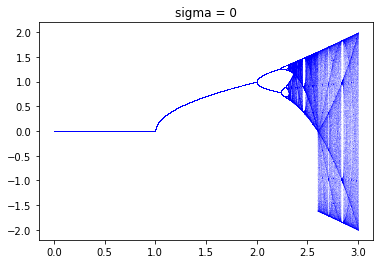

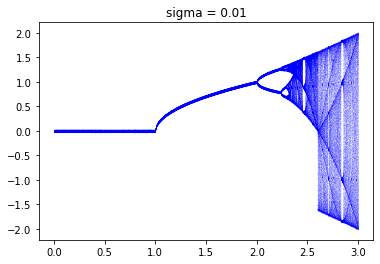

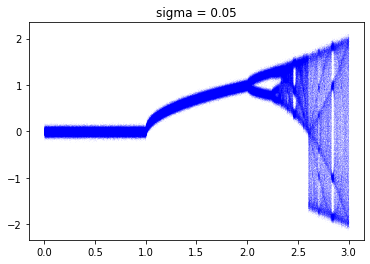

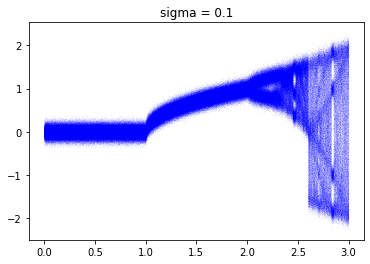

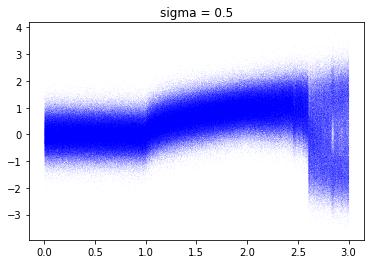

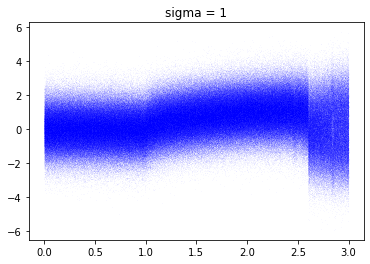

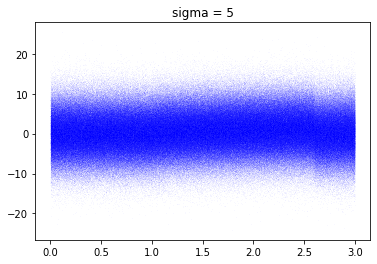

In [65]:
zadanie_2a(sigma=0)
zadanie_2a(sigma=0.01)
zadanie_2a(sigma=0.05)
zadanie_2a(sigma=0.1)
zadanie_2a(sigma=0.5)
zadanie_2a(sigma=1)
zadanie_2a(sigma=5)

Z wykresów zauważamy, że dla małych wartości `sigma` (poniżej `0.25`), szum poniekąd zwiększa otrzymywany chaos. Dla wielkości `sigma` zbliżających się do "wysokości" danych, cała bifurkacja powoli zanika, gdyż jest wtedy "mało istotna". 

### 2.b

Zrób to samo z atraktorem Lorenza. Za każdym krokiem losuj z Gaussa każdy z parametrów systemu Lorenza. Wartość oczekiwana dla rozkładu jest równa parametrowi Lorenza i zmienia się sigma.

In [67]:
%matplotlib inline
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

def zadanie_2b(sigma=1.0):

    def generate_Gaussian_noise(sigma=sigma, mu=0, size=1):
        # sigma = standard deviation
        # mu = mean 
        s = np.random.normal(mu, sigma, size=size)
        return s

    colorIndex = 0
    figureIndex = 0
    colors = ['b','g','r','c','m','y','b']

    def next_colour():
        global colorIndex
        colorIndex+=1
        return colors[ colorIndex % len(colors) ]

    def next_figure():
        global figureIndex
        figureIndex+=1
        return figureIndex;

    def draw_lorentz(iters,s,r,b,x,y,z):
        
        # initialize  
        xresult = [x]
        yresult = [y]
        zresult = [z]
        t = 0.
        timesteps = [t]
        
        while t < iters *1.:
            #update

            # Zmiana parametrów na podstawie Gaussian noise
            s = generate_Gaussian_noise(mu=s, sigma=sigma)[0]
            r = generate_Gaussian_noise(mu=r, sigma=sigma)[0]
            b = generate_Gaussian_noise(mu=b, sigma=sigma)[0]

            nextx = x + (s * (y - x)) * Dt
            nexty = y + (r * x - y - x * z) * Dt
            nextz = z + (x * y - b * z) * Dt
            x, y, z = nextx, nexty, nextz
            t = t + Dt
            #observe
            xresult.append(x)
            yresult.append(y)
            zresult.append(z)
            timesteps.append(t)
        
        c1 = next_colour()
        #figure(1)
        #subplot(3, 1, 1)
        #plot(timesteps, xresult,color=c1 )
        #xlabel('t')
        #ylabel('x')
        
        #subplot(3, 1, 2)
        #plot(timesteps, yresult,color=c1)
        #xlabel('t')
        #ylabel('y')
        
        #subplot(3, 1, 3)
        #plot(timesteps, zresult,color=c1)
        #xlabel('t')
        #ylabel('z')
        
        figure(2)
        ax = gca(projection='3d')
        ax.set_title(f"sigma = {sigma}")
        ax.plot(xresult, yresult, zresult, color=c1)
        
        

    # parameters
    iters = 25
    s = 10.
    r = 28.
    b = 8/3.
    Dt = 0.005    
        
    x = 1.
    y = 1.
    z = 1.

    draw_lorentz(iters,s,r,b,x,y,z)

    show()

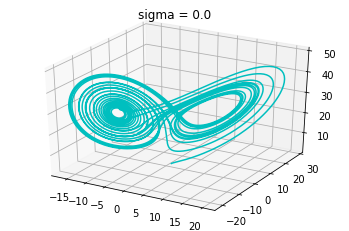

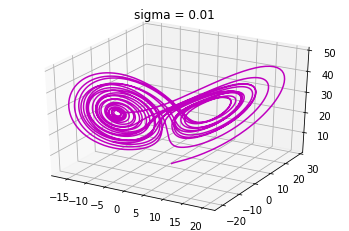

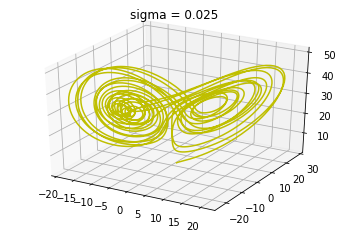

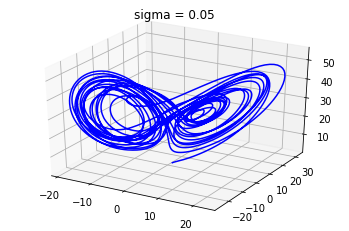

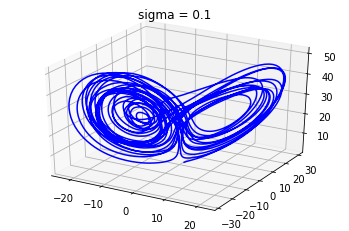

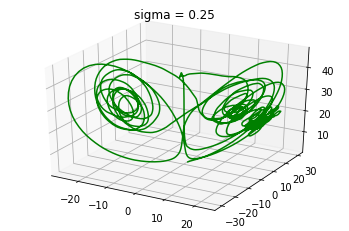

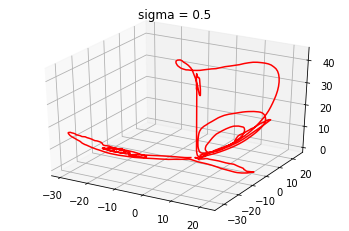

In [70]:
zadanie_2b(sigma=0.00)
zadanie_2b(sigma=0.01)
zadanie_2b(sigma=0.025)
zadanie_2b(sigma=0.05)
zadanie_2b(sigma=0.1)
zadanie_2b(sigma=0.25)
zadanie_2b(sigma=0.5)

Ponownie jak w punkcie 2a - dla małych wartości `sigma` (`<0.25`) wynik atraktora jest jeszcze mniej przewidywalny, zwiększając tym samym cały chaos. Dla wartości większych natomiast, wartości `x,y,z` szybko uciekają z atraktora.

### 2.c

Jaki ogólny wniosek płynie z wyników?

Patrząc na wykonane zadania, myślę że możnaby stwierdzić, iż dodanie szumu Gaussowskiego z mocą `~1/10` amplitudy jest w stanie zwiększyć uzyskany przez nas chaos. 

Dla większych wartości szum zbyt mocno oddziałowuje na wynik.